In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import pandas as pd 

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sqlalchemy import create_engine 
from sqlalchemy.engine.url import URL 

import math 
import warnings 
import missingno 

warnings.filterwarnings("ignore")
plt.style.use("default")
sns.set(style="whitegrid")

## Challenge: Factors that affect life expectancy

Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

- First, load the dataset.

- Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

- Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

- In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

- Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

In [2]:
kagle = dict(
    drivername="postgresql",
    username="dsbc_student", 
    password="7*.8G9QH21", 
    host="142.93.121.174", 
    port="5432", 
    database="lifeexpectancy"
)

engine = create_engine(URL(**kagle), echo=True)

life_expect_df = pd.read_sql_query("SELECT * FROM lifeexpectancy", con=engine)

engine.dispose()

2019-12-02 15:53:54,096 INFO sqlalchemy.engine.base.Engine select version()
2019-12-02 15:53:54,097 INFO sqlalchemy.engine.base.Engine {}
2019-12-02 15:53:54,213 INFO sqlalchemy.engine.base.Engine select current_schema()
2019-12-02 15:53:54,213 INFO sqlalchemy.engine.base.Engine {}
2019-12-02 15:53:54,315 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-12-02 15:53:54,316 INFO sqlalchemy.engine.base.Engine {}
2019-12-02 15:53:54,368 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-12-02 15:53:54,369 INFO sqlalchemy.engine.base.Engine {}
2019-12-02 15:53:54,419 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2019-12-02 15:53:54,420 INFO sqlalchemy.engine.base.Engine {}
2019-12-02 15:53:54,524 INFO sqlalchemy.engine.base.Engine SELECT * FROM lifeexpectancy
2019-12-02 15:53:54,525 INFO sqlalchemy.engine.base.Engine {}


In [3]:
# For Reference print a list of the column headers
print(*(x for x in life_expect_df.columns), sep='\n')

Country
Year
Status
Life expectancy 
Adult Mortality
infant deaths
Alcohol
percentage expenditure
Hepatitis B
Measles 
 BMI 
under-five deaths 
Polio
Total expenditure
Diphtheria 
 HIV/AIDS
GDP
Population
 thinness  1-19 years
 thinness 5-9 years
Income composition of resources
Schooling


In [6]:
# Sample the dataframe to get a feel for the categorical and continuous variables.
display(life_expect_df.sample(n=10))

# Get a total of unique values per variable to help distinguish categorical vs. continuous values
display(life_expect_df.nunique())

# Show info on datatypes and initial nulls
display(life_expect_df.info())

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1263,Ireland,2003,Developed,78.0,82.0,0,13.24,675.213472,NaN,584,...,86.0,7.50,86.0,0.1,4117.155320,3996521.0,0.3,0.2,0.870,16.8
816,Egypt,2001,Developing,68.6,177.0,63,0.14,0.000000,99.0,2150,...,99.0,5.75,99.0,0.1,NaN,NaN,3.5,3.4,0.612,11.1
2182,Saint Lucia,2002,Developing,72.0,174.0,0,11.85,0.000000,14.0,0,...,9.0,6.33,74.0,0.1,NaN,NaN,4.4,4.5,0.681,12.5
1719,Mongolia,2013,Developing,68.1,227.0,1,0.01,241.195864,98.0,0,...,98.0,4.21,98.0,0.1,4385.379355,286917.0,2.2,2.3,0.720,14.7
63,Angola,2001,Developing,45.7,44.0,97,2.58,30.359936,NaN,9046,...,41.0,5.38,38.0,2.1,526.168743,16983266.0,1.7,1.7,0.391,5.1
645,Croatia,2011,Developed,77.0,14.0,0,12.19,1913.356642,97.0,12,...,96.0,7.80,96.0,0.1,14539.184210,428622.0,1.6,1.5,0.808,14.5
1060,Guatemala,2014,Developing,71.7,187.0,10,1.88,657.528280,73.0,0,...,65.0,6.20,73.0,0.4,3687.763767,15923559.0,1.2,1.2,0.614,10.7
2409,South Sudan,2015,Developing,57.3,332.0,26,NaN,0.000000,31.0,878,...,41.0,NaN,31.0,3.4,758.725782,11882136.0,NaN,NaN,0.421,4.9
2904,Yemen,2001,Developing,61.1,251.0,46,0.08,0.000000,19.0,485,...,73.0,4.34,73.0,0.1,NaN,NaN,14.0,14.0,0.444,7.9
1423,Kyrgyzstan,2003,Developing,66.6,217.0,4,3.52,0.000000,99.0,6,...,98.0,5.43,98.0,0.1,NaN,NaN,3.5,3.5,0.602,12.2


Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

None

I want to change several of the datatypes in the dataframe to make processing easier.  The "Country" and "Status" variables will change to the categorical type and the "Year" variable will convert to datetime.

In [7]:
# Change the "Country" and "Status" variables to categorical
life_expect_df[["Country", "Status"]] = life_expect_df[["Country", "Status"]].astype("category")

# Change the "Year" variable to datetime
life_expect_df["Year"] = pd.to_datetime(life_expect_df["Year"], format="%Y")

life_expect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null category
Year                               2938 non-null datetime64[ns]
Status                             2938 non-null category
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          

Number of null values: 1289


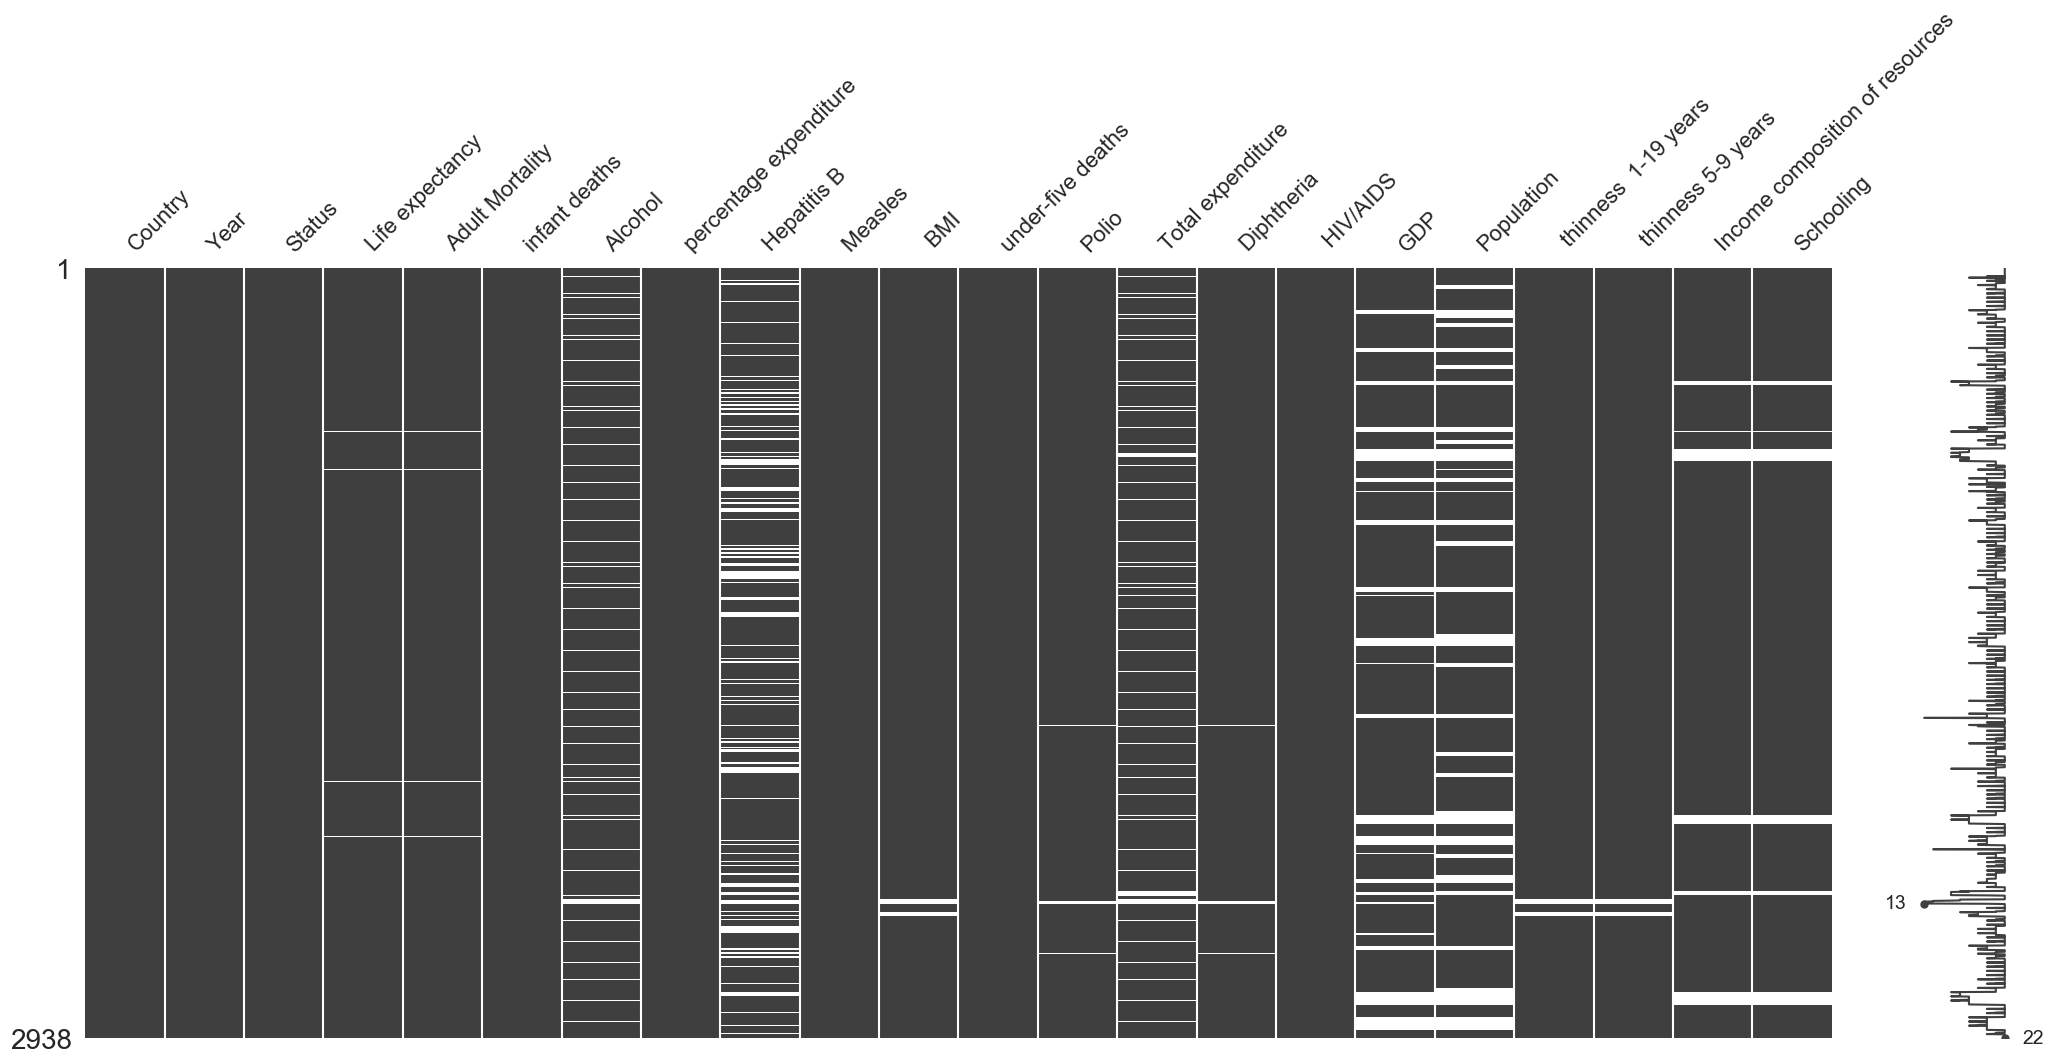

In [8]:
# Take a look visually at the nulls in the dataframe
def report_null_entries(df):
    if len(df[df.isnull().any(axis=1)] != 0):
        print(f"Number of null values: {len(df[df.isnull().any(axis=1)])}")
        missingno.matrix(df)
        plt.show()
    else:
        print("No rows with null values found.")

report_null_entries(life_expect_df)

In [10]:


categorical_cols = life_expect_df.select_dtypes(include="category").columns
continuous_cols = life_expect_df.select_dtypes(exclude=['object','category','datetime64[ns]']).columns

# Create a rowcount variable
df_len = len(life_expect_df)

# Calculated the width of the longest column
max_col = len(max(life_expect_df.columns, key=len))

for col in categorical_cols: 
    # Use sorted function to generate a list of the 5 shortest categories
    short_cats = sorted(set(life_expect_df[col]), key=len)[:5]
    print(f"First five shortest strings in '{col}': {short_cats}")

# Look at null value information for continuous variables
for col in categorical_cols:
    empty_strings = len(life_expect_df.loc[life_expect_df[col]==''])
    nulls = life_expect_df[col].isna().sum()
    tot_nulls = empty_strings + nulls
    pct_nan = tot_nulls*100/df_len
    print(f"{col:<{max_col}}: {tot_nulls:>{5}} nulls | percent null: {pct_nan:>{5}.2f}")

# Look a null value information for continuous variables
for col in continuous_cols:
    nulls = life_expect_df[col].isnull().sum()
    pct_null = nulls*100/df_len
    print(f"{col:<{max_col}}: {nulls:>{5}} nulls | percent null: {pct_null:>{5}.2f}")

First five shortest strings in 'Country': ['Niue', 'Togo', 'Oman', 'Peru', 'Cuba']
First five shortest strings in 'Status': ['Developed', 'Developing']
Country                        :     0 nulls | percent null:  0.00
Status                         :     0 nulls | percent null:  0.00
Life expectancy                :    10 nulls | percent null:  0.34
Adult Mortality                :    10 nulls | percent null:  0.34
infant deaths                  :     0 nulls | percent null:  0.00
Alcohol                        :   194 nulls | percent null:  6.60
percentage expenditure         :     0 nulls | percent null:  0.00
Hepatitis B                    :   553 nulls | percent null: 18.82
Measles                        :     0 nulls | percent null:  0.00
 BMI                           :    34 nulls | percent null:  1.16
under-five deaths              :     0 nulls | percent null:  0.00
Polio                          :    19 nulls | percent null:  0.65
Total expenditure              :   226 nulls

In [13]:
# Dataframe cols have leading/trailing whitespace, strip it off
life_expect_df.columns = life_expect_df.columns.str.strip()

In [18]:
# Need to replace null values in the following columns
continuous_cols = life_expect_df.select_dtypes(exclude=['object','category','datetime64[ns]']).columns
null_replace_cols = list(continuous_cols)

In [19]:
# Since this is temporal data, use interpolation to fill in missing values
life_expectancy_interpolated = life_expect_df.copy()

# Get a list of states to iterate over
countries = life_expectancy_interpolated["Country"].unique()

for country in countries:
    life_expectancy_interpolated.loc[life_expectancy_interpolated["Country"] == country, null_replace_cols]=life_expectancy_interpolated.loc[life_expectancy_interpolated["Country"] == country, null_replace_cols].interpolate()

life_expectancy_interpolated.dropna(inplace=True)

print("Interpolation complete.")

Interpolation complete.


In [20]:
life_expectancy_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2937
Data columns (total 22 columns):
Country                            1987 non-null category
Year                               1987 non-null datetime64[ns]
Status                             1987 non-null category
Life expectancy                    1987 non-null float64
Adult Mortality                    1987 non-null float64
infant deaths                      1987 non-null int64
Alcohol                            1987 non-null float64
percentage expenditure             1987 non-null float64
Hepatitis B                        1987 non-null float64
Measles                            1987 non-null int64
BMI                                1987 non-null float64
under-five deaths                  1987 non-null int64
Polio                              1987 non-null float64
Total expenditure                  1987 non-null float64
Diphtheria                         1987 non-null float64
HIV/AIDS                           